In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [2]:
#nltk.download('stopwords')

In [3]:
#nltk.install_opener('stopwords')

In [4]:
%pwd

'C:\\Users\\RAHUL\\PYTHON Assignment\\Data Science\\5. Bank Reviews-Complaints Analysis'

In [5]:
bank = pd.read_excel('BankReviews.xlsx')

In [6]:
bank.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [7]:
bank.Stars.unique()

array([5, 1], dtype=int64)

In [8]:
bank.Reviews[15]

'Austen has been awsome in every step of the way with my refi and new home purchase. He explains your best options thoroughly with out any of the B.S other companies use to get your business . Being a repeat customer says it all.'

In [9]:
bank.BankName.unique()

array(['Wyndham Capital Mortgage', 'North American Savings Bank',
       'Reliance First Capital', 'Pacific Beneficial Mortgage Co',
       'Triumph Lending', 'LoanSnap', 'Guarenteed Rate Inc'], dtype=object)

In [10]:
bank.drop(columns=['Date'],inplace=True)

In [11]:
bank.shape

(505, 3)

In [12]:
bank.head()

,Stars,Reviews,BankName
0,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


### Pre-Processing

### Correct for any spell mistakes

In [13]:
def correct(x):
    return str(TextBlob(x).correct())

bank['Reviews'] = bank['Reviews'].apply(lambda x:correct(x))

### Clean Text

In [14]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [15]:
stop = set(nltk.corpus.stopwords.words('english'))

In [16]:
bank['Reviews'] = bank['Reviews'].apply(lambda x: clean_text(x))

In [17]:
bank['Reviews'] = bank['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [18]:
bank['Reviews'] = bank['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Calculating Sentiment analysis using Textblob module

In [19]:
bank['Sentiment'] = bank['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity )

In [20]:
bank.head()

,Stars,Reviews,BankName,Sentiment
0,5,great job wyndham capital person professional ...,Wyndham Capital Mortgage,0.433333
1,5,matthew richardson professional helpful helped...,Wyndham Capital Mortgage,0.550000
2,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,-0.033869
3,5,dealing thomka beginning started distressful t...,Wyndham Capital Mortgage,0.086561
4,5,cant express grateful support provided family ...,Wyndham Capital Mortgage,0.086667


In [21]:
bank.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [22]:
bank_positive = bank[bank.Sentiment > 0]
bank_neutral = bank[bank.Sentiment == 0]
bank_negative = bank[bank.Sentiment < 0]

(445, 4)


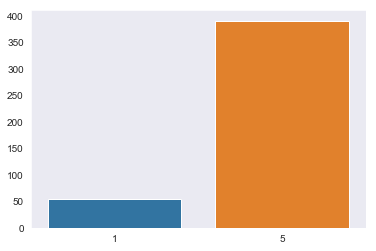

In [23]:
print(bank_positive.shape)

a = bank_positive.Stars.value_counts()
sns.barplot(x=a.index,y=a.values)
plt.show()

(14, 4)


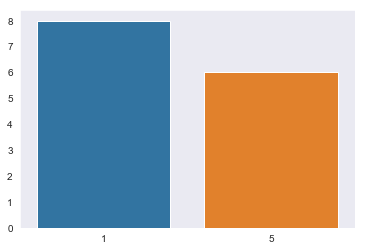

In [24]:
print(bank_neutral.shape)

a = bank_neutral.Stars.value_counts()
sns.barplot(x=a.index,y=a.values)
plt.show()

(46, 4)


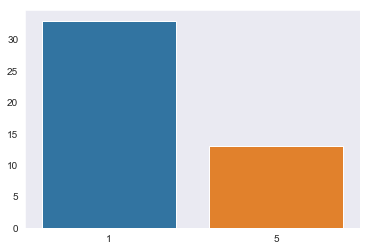

In [25]:
print(bank_negative.shape)

a = bank_negative.Stars.value_counts()
sns.barplot(x=a.index,y=a.values)
plt.show()

In [26]:
def rev(x):
    if x > 0:
        return 'Positive'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
bank['Review_Type'] = bank['Sentiment'].apply(lambda x:rev(x))

In [27]:
bank.head()

,Stars,Reviews,BankName,Sentiment,Review_Type
0,5,great job wyndham capital person professional ...,Wyndham Capital Mortgage,0.433333,Positive
1,5,matthew richardson professional helpful helped...,Wyndham Capital Mortgage,0.550000,Positive
2,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,-0.033869,Negative
3,5,dealing thomka beginning started distressful t...,Wyndham Capital Mortgage,0.086561,Positive
4,5,cant express grateful support provided family ...,Wyndham Capital Mortgage,0.086667,Positive


In [28]:
a = bank.groupby(['BankName','Stars'])['Stars'].agg({'Number_of_records':'sum'}).reset_index()
a

,BankName,Stars,Number_of_records
0,Guarenteed Rate Inc,1,21
1,Guarenteed Rate Inc,5,300
2,LoanSnap,5,200
3,North American Savings Bank,1,46
4,North American Savings Bank,5,735
5,Pacific Beneficial Mortgage Co,1,5
6,Pacific Beneficial Mortgage Co,5,230
7,Reliance First Capital,1,18
8,Reliance First Capital,5,200
9,Triumph Lending,5,300


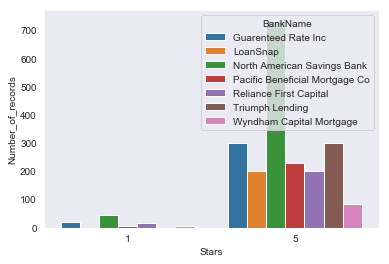

In [29]:
sns.barplot(x='Stars',y='Number_of_records',data=a,hue='BankName')
plt.show()

 - As per the above diagram, apart from "Loan Soap", all the other Banks do show same variance for ythe ratings received for both 1 & 5. Hence not much of analysis can be fdone on the basis of the Bank Names.

### Split the data into train & Test

In [30]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = bank.Reviews
y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [31]:
bank.shape

(505, 5)

In [32]:
bank.head()

,Stars,Reviews,BankName,Sentiment,Review_Type
0,5,great job wyndham capital person professional ...,Wyndham Capital Mortgage,0.433333,Positive
1,5,matthew richardson professional helpful helped...,Wyndham Capital Mortgage,0.550000,Positive
2,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,-0.033869,Negative
3,5,dealing thomka beginning started distressful t...,Wyndham Capital Mortgage,0.086561,Positive
4,5,cant express grateful support provided family ...,Wyndham Capital Mortgage,0.086667,Positive


### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [78]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), 
                             min_df=0.01,
                             max_df=0.95,
                             encoding='utf-8',
                             max_features=100
                            )
xtrain_count = count_vect.fit_transform(X_train)

In [79]:
xtrain_count

<378x100 sparse matrix of type '<class 'numpy.int64'>'
	with 4679 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [80]:
dtm=xtrain_count.toarray()

In [81]:
dtm

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
count_vect.get_feature_names()

['able',
 'also',
 'always',
 'answer',
 'anyone',
 'back',
 'bank',
 'best',
 'business',
 'call',
 'called',
 'close',
 'closed',
 'closing',
 'communication',
 'company',
 'cost',
 'could',
 'credit',
 'customer',
 'customer service',
 'dam',
 'day',
 'done',
 'easy',
 'email',
 'entire',
 'even',
 'every',
 'everything',
 'experience',
 'extremely',
 'finance',
 'financing',
 'first',
 'flex',
 'friendly',
 'get',
 'go',
 'going',
 'good',
 'got',
 'great',
 'hard',
 'head',
 'help',
 'helpful',
 'highly',
 'highly recommend',
 'home',
 'house',
 'information',
 'kirk',
 'know',
 'knowledgeable',
 'lender',
 'like',
 'loan',
 'loan officer',
 'looking',
 'made',
 'make',
 'mortgage',
 'much',
 'nasb',
 'need',
 'never',
 'officer',
 'one',
 'phone',
 'process',
 'professional',
 'question',
 'quick',
 'rate',
 'received',
 'recommend',
 'responsive',
 'said',
 'sent',
 'service',
 'sure',
 'team',
 'thank',
 'thanks',
 'thing',
 'time',
 'told',
 'took',
 'u',
 'use',
 'way',
 'wee

In [83]:
dtm1=pd.DataFrame(dtm)
dtm1.columns = count_vect.get_feature_names()

In [84]:
dtm1.head()

,able,also,always,answer,anyone,back,bank,best,business,call,...,use,way,week,well,went,work,worked,working,would,year
0,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,2,0,0,0


### Vectorization (count, tfidf) for both train & test

In [85]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), 
                             min_df=0.01,
                             max_df=0.95,
                             encoding='utf-8',
                             max_features=100
                            )
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)


In [86]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [87]:
dtm2.head()

,able,also,always,answer,anyone,back,bank,best,business,call,...,use,way,week,well,went,work,worked,working,would,year
0,0.0,0.153649,0.000000,0.000000,0.0,0.160986,0.167869,0.0,0.0,0.000000,...,0.153649,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.153649
1,0.0,0.000000,0.282533,0.335598,0.0,0.338896,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.333124,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.270525,...,0.000000,0.0,0.0,0.324701,0.0,0.000000,0.000000,0.298889,0.0,0.000000
3,0.0,0.153649,0.000000,0.000000,0.0,0.160986,0.167869,0.0,0.0,0.000000,...,0.153649,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.153649
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.291899,...,0.000000,0.0,0.0,0.350356,0.0,0.250099,0.597503,0.000000,0.0,0.000000


In [90]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}',min_df=0.01,max_df=0.95,max_features=100, ngram_range=(1, 2))
tfidf_vect_ngram.fit(bank['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [91]:
xtrain_tfidf_ngram

<378x100 sparse matrix of type '<class 'numpy.float64'>'
	with 4697 stored elements in Compressed Sparse Row format>

### Topic Modeling 

In [92]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=100,max_doc_update_iter=200,random_state=1234)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

### Intent Analysis

In [93]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['information u first process time thank responsive home service team',
 'professional phone customer worked working hard one information process home',
 'got like team work u question professional time closing great',
 'always done answer help thing helpful service get question everything',
 'closing week cost time day rate loan get took nasb',
 'helpful service customer service customer friendly best responsive great recommend team',
 'communication extremely process rate would financing never mortgage company time',
 'business bank know professional get loan great highly would experience',
 'quick work help dam great professional recommend question u highly recommend',
 'great rate easy work closing experience got time flex good',
 'call looking anyone phone one email mortgage sure would week',
 'flex lender company way working go great business best every',
 'officer loan officer loan u way nasb best finance could get',
 'responsive hard work make good sure went u worked always',
 

## Check for most frequent Words Used

In [94]:
frequency_words_wo_stop_pos= {}
frequency_words_wo_stop_neg= {}

for data in bank_positive['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop_pos:
                count = frequency_words_wo_stop_pos[token]
                count = count + 1
                frequency_words_wo_stop_pos[token] = count
            else:
                frequency_words_wo_stop_pos[token] = 1
                
for data in bank_negative['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop_neg:
                count = frequency_words_wo_stop_neg[token]
                count = count + 1
                frequency_words_wo_stop_neg[token] = count
            else:
                frequency_words_wo_stop_neg[token] = 1

In [95]:
frequency_words_wo_stop_pos

{'great': 138,
 'job': 22,
 'wyndham': 12,
 'capital': 10,
 'person': 15,
 'professional': 74,
 'helped': 34,
 'u': 194,
 'move': 12,
 'finance': 68,
 'process': 236,
 'smoothly': 11,
 'thank': 47,
 'matthew': 3,
 'richardson': 1,
 'helpful': 55,
 'find': 17,
 'correct': 1,
 'product': 12,
 'mortgage': 138,
 'much': 31,
 'excellent': 29,
 'service': 97,
 'dealing': 14,
 'thomka': 2,
 'beginning': 30,
 'started': 12,
 'distressful': 24,
 'time': 206,
 'help': 36,
 'entire': 46,
 'team': 108,
 'turned': 3,
 'happy': 37,
 'ending': 1,
 'went': 62,
 'beyond': 24,
 'extra': 18,
 'mile': 7,
 'right': 28,
 'wrong': 3,
 'encountered': 6,
 'previous': 8,
 'loan': 274,
 'pulled': 1,
 'together': 7,
 'found': 13,
 'viable': 1,
 'option': 28,
 'ultimately': 4,
 'saved': 6,
 'money': 18,
 'indebted': 1,
 'would': 202,
 'highly': 61,
 'recommend': 136,
 'need': 39,
 'interest': 32,
 'thanks': 59,
 '&': 29,
 'lindread': 1,
 'le': 15,
 'cant': 26,
 'express': 9,
 'grateful': 3,
 'support': 10,
 'provi

In [96]:
frequency_words_wo_stop_neg

{'past': 1,
 'experience': 16,
 'wyndham': 4,
 'mortgage': 17,
 'would': 38,
 'without': 4,
 'question': 2,
 'use': 11,
 'needed': 4,
 'went': 5,
 'beyond': 1,
 'extra': 1,
 'mile': 1,
 'right': 2,
 'wrong': 4,
 'encountered': 1,
 'service': 9,
 'dealing': 2,
 'previous': 5,
 'loan': 29,
 'pulled': 3,
 'together': 1,
 'found': 2,
 'viable': 2,
 'option': 3,
 'u': 13,
 'ultimately': 1,
 'saved': 1,
 'money': 4,
 'highly': 3,
 'recommend': 19,
 'thomka': 1,
 'capital': 2,
 'team': 5,
 'need': 3,
 'interest': 1,
 'thanks': 2,
 '&': 1,
 'mind': 1,
 'worst': 2,
 'ever': 2,
 'like': 4,
 'never': 11,
 'gone': 1,
 'process': 18,
 'could': 4,
 'get': 14,
 'complete': 1,
 'list': 5,
 'document': 5,
 'required': 1,
 'day': 6,
 'new': 8,
 'request': 2,
 'appraise': 1,
 'hired': 1,
 'made': 10,
 'many': 3,
 'mistake': 4,
 'send': 5,
 'correction': 2,
 'underwriting': 1,
 'go': 4,
 'back': 7,
 'make': 7,
 'wyndum': 1,
 'continue': 3,
 'ask': 2,
 'copy': 5,
 'time': 15,
 'lost': 2,
 'filed': 1,
 'cor

In [97]:
frequency_words_wo_stop_pos_count = pd.DataFrame(frequency_words_wo_stop_pos,index=['Count']).T
frequency_words_wo_stop_pos_count.sort_values(by=['Count'],ascending=False,inplace=True)

frequency_words_wo_stop_neg_count = pd.DataFrame(frequency_words_wo_stop_neg,index=['Count']).T
frequency_words_wo_stop_neg_count.sort_values(by=['Count'],ascending=False,inplace=True)

### Most Frequent Positive Words

In [98]:
frequency_words_wo_stop_pos_count.head(20)

,Count
loan,274
process,236
time,206
would,202
u,194
home,188
head,170
mortgage,138
great,138
work,136


### Most Frequent Negative Words

In [99]:
frequency_words_wo_stop_neg_count.head(20)

,Count
would,38
loan,29
company,22
recommend,19
process,18
mortgage,17
experience,16
head,16
time,15
get,14


In [100]:
from wordcloud import WordCloud ,STOPWORDS

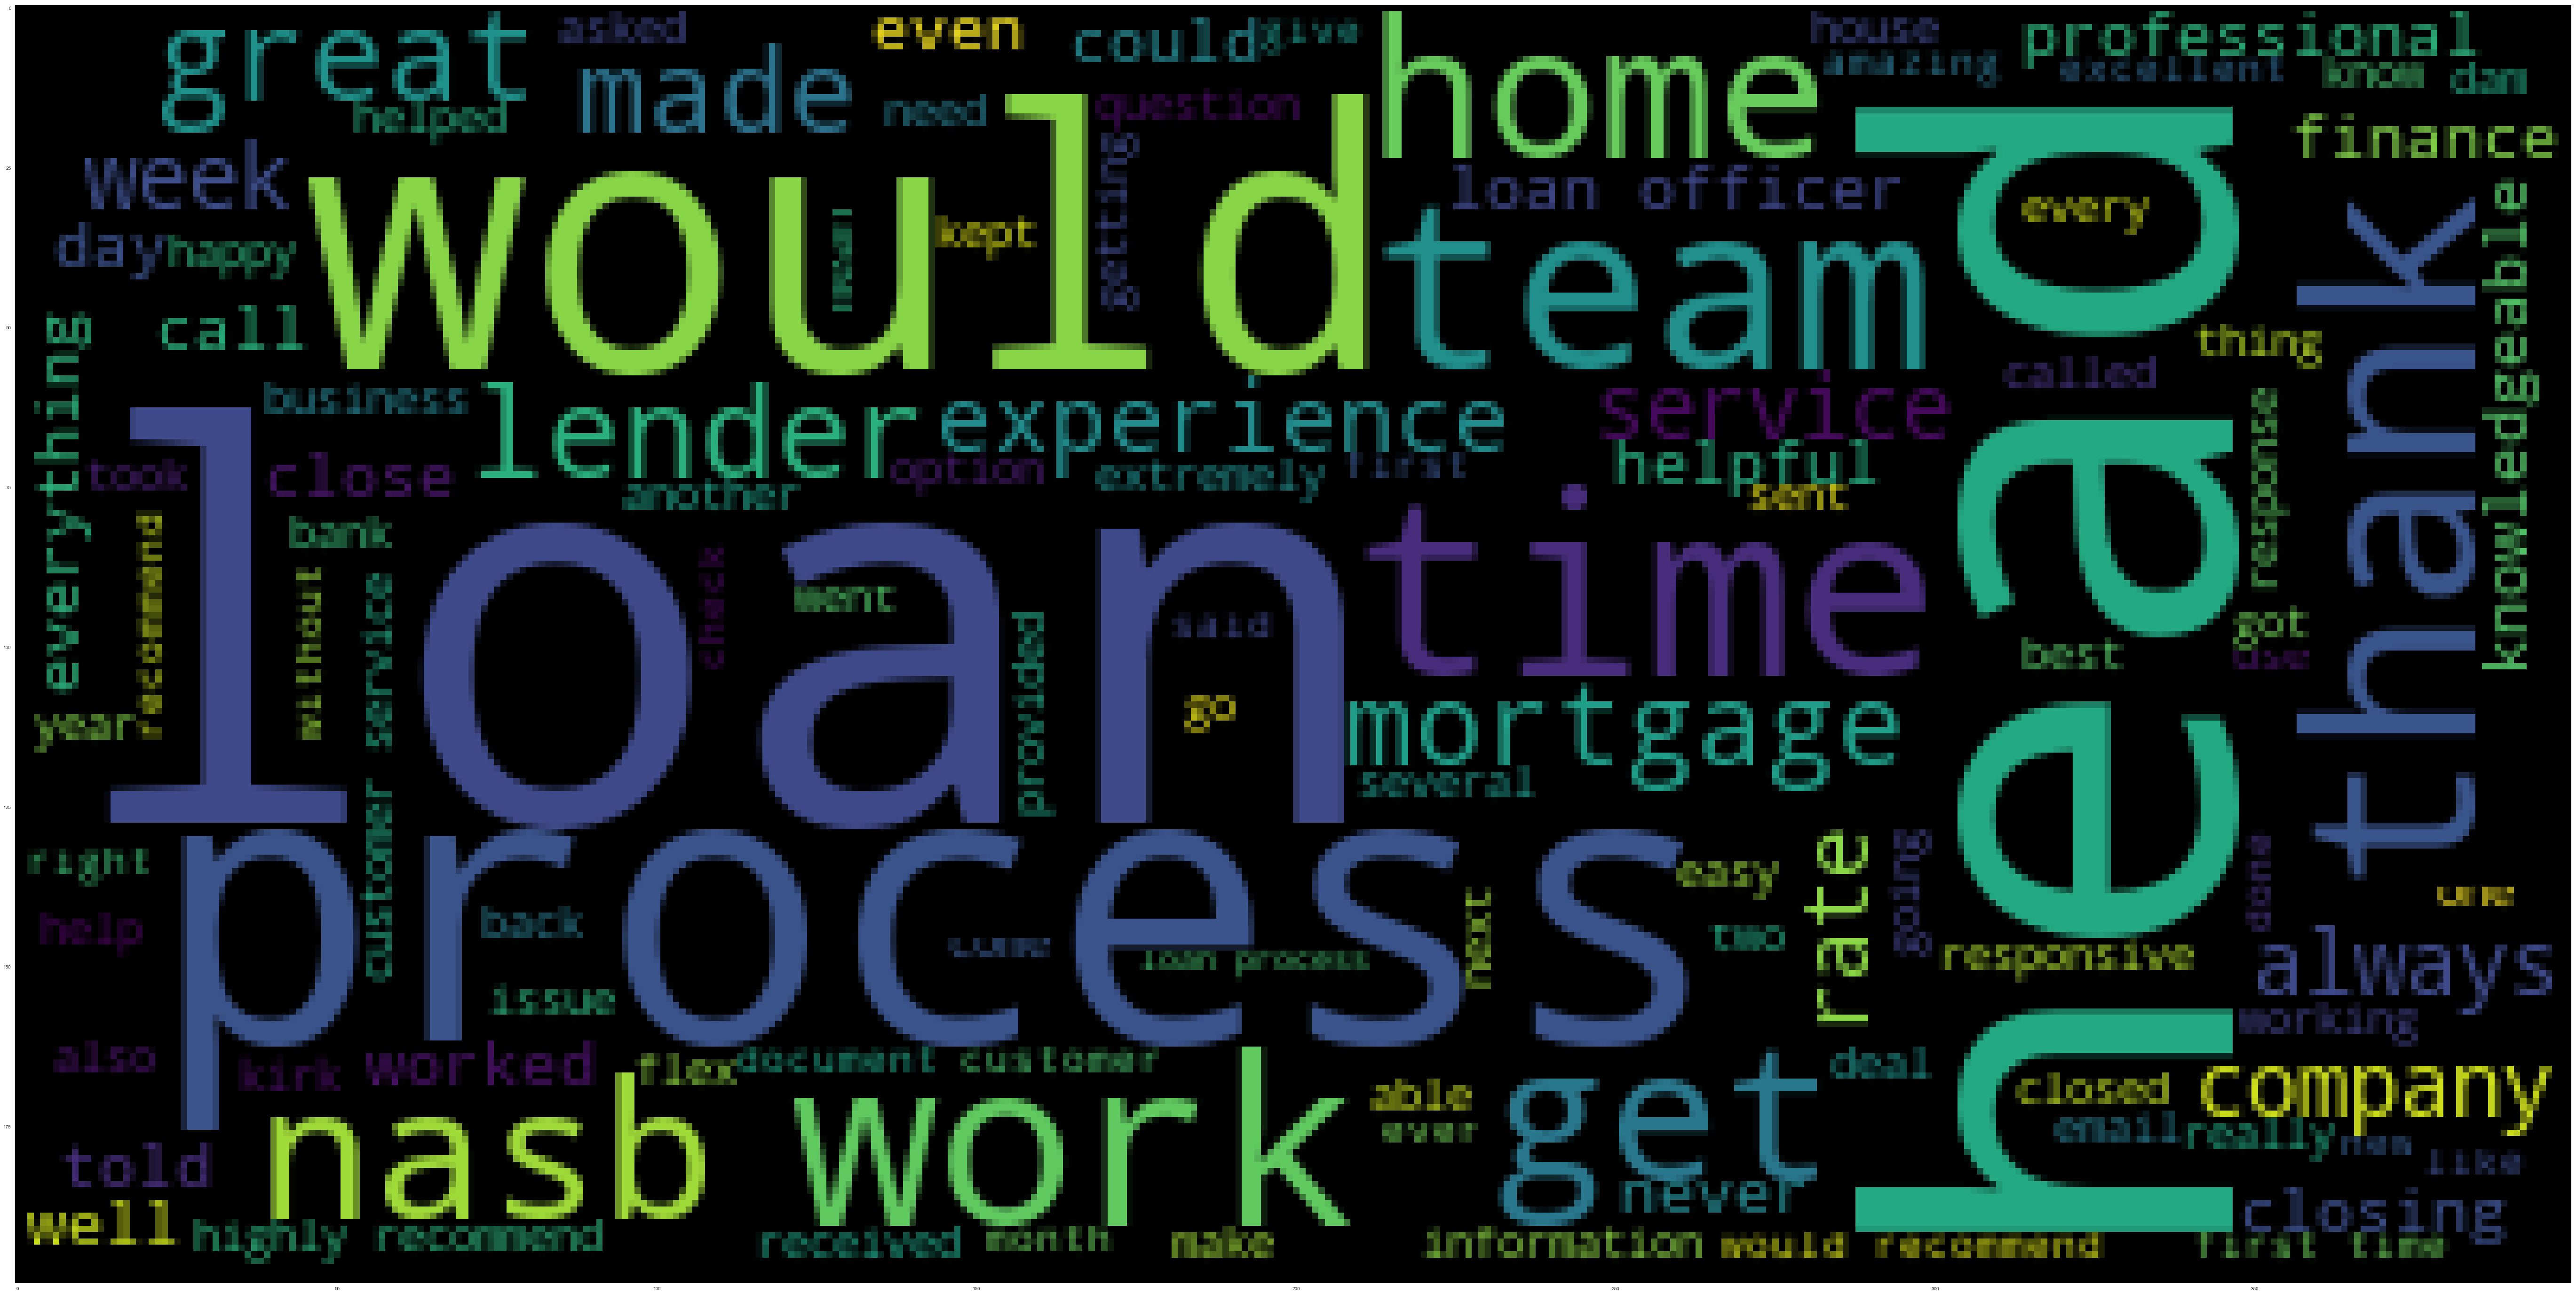

In [101]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Create user defined function for train the models

In [102]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.roc_auc_score(predictions, valid_y)

### Building different models with different vectors

In [103]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)


NB  for L1, Count Vectors:  0.9322033898305084


In [104]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

NB  for L1, WordLevel TF-IDF:  0.8579439252336448


In [105]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)


LR  for L1, Count Vectors:  0.9322033898305084
LR  for L1, WordLevel TF-IDF:  0.9722222222222222
LR  for L1, N-Gram Vectors:  0.9358974358974359


In [106]:
#Decision Tree
# Decision Tree on Count Vectors and TF-IDF

from sklearn.tree import DecisionTreeClassifier

accuracy_L1 = train_model(DecisionTreeClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("DT  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(DecisionTreeClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("DT  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(DecisionTreeClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("DT  for L1, N-Gram Vectors: ", accuracy_L1)


DT  for L1, Count Vectors:  0.8115003808073115
DT  for L1, WordLevel TF-IDF:  0.8356816450875857
DT  for L1, N-Gram Vectors:  0.8384301732925586


In [107]:
#Decision Tree
# Decision Tree on Count Vectors and TF-IDF

from sklearn.ensemble import RandomForestClassifier

accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("RF  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count, y_test)
print("RF  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("RF  for L1, N-Gram Vectors: ", accuracy_L1)


RF  for L1, Count Vectors:  0.9045209176788124
RF  for L1, WordLevel TF-IDF:  0.9180825242718447
RF  for L1, N-Gram Vectors:  0.9103313840155947


In [108]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)


SVC  for L1, Count Vectors:  0.9638377926421406
SVC  for L1, WordLevel TF-IDF:  0.9526055705300988
SVC  for L1, N-Gram Vectors:  0.9811320754716981


## Conclusion

- The SVC Model shows the best ROC AUC Score and is recommended to be used for future predictions